In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import matplotlib.dates as mdates
import matplotlib.units as munits
from matplotlib.lines import Line2D
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[dt.date] = converter
munits.registry[dt.datetime] = converter

plt.set_cmap("tab10")

today = dt.date.today()
yesterday = today - dt.timedelta(days=1)

<Figure size 432x288 with 0 Axes>

In [2]:
def process_state_tracker(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
    df.sort_values(by=["date"], inplace=True)
    df["hosp_7day"] = df.hospitalizedCurrently.rolling(7).mean()
    df["pct_pos"] = df.positiveIncrease / df.totalTestResultsIncrease
    df["death_7day"] = df.deathIncrease.rolling(7).mean()

In [3]:
def plot_state_data(
    state_df, 
    filename,
    save=False,
    title="Georgia COVID Trends",
    reopen_text="Opened:\n - outdoor and recreation;gyms\n - entertainment (eg. theaters)\n - retail and beauty\n - restaurant dining",
    reopen_y=90,
    reopen_x="2020-03-12",
    reopen_y2=400,
    reopen_y3=1400,
    reopen_y4=1.2,
    sip_date="2020-04-03",
    sip_y=90,
    sip_text="SIP\n(4/3)",
    reopen_date="2020-04-24",
    reopen_date_y=90,
    reopen_date_text="Reopen\n(4/24)",
    x_lim="2020-03-01",
    x_lim2="2020-03-02",
    x_lim3="2020-03-01",
    state="GA",
    rt_img='florida_rt_0519.png',
    phase2=False,
    phase2_text=None,
    phase2_date="2020-05-01",
    hosp_col="hospitalizedIncrease",
    hosp_title="New Hospitalizations",
    both_hosp=False
):
    '''
    '''
#     state_rt = rt[rt.region == state]
    
    fig, ax = plt.subplots(2,2, figsize=(20,11))
    
    # CASES & PERCENT POSITIVE
    ax[0,0].plot(state_df["date"], state_df["positiveIncrease"].rolling(7).mean(), label="New Cases")
    ax[0,0].bar(state_df["date"], state_df["positiveIncrease"], alpha=0.4)

    ax[0,0].text(
        pd.to_datetime(reopen_x), 
        sip_y-10, 
        reopen_text, 
        va="top",
        zorder=100,
        bbox=dict(
            boxstyle="round",
            ec='lightgrey',
            fc='whitesmoke',
            alpha=1.0,
            zorder=99,
            fill=True
        )
    )

    ax[0,0].axvline(pd.to_datetime(reopen_date), ymax=0.98, c="g", alpha=0.8)
    ax[0,0].text(pd.to_datetime(reopen_date) + dt.timedelta(seconds=60*60*12), reopen_y, reopen_date_text)
    
    if phase2:
        ax[0,0].axvline(pd.to_datetime(phase2_date), ymax=0.98, c="g", alpha=0.8)
        ax[0,0].text(pd.to_datetime(phase2_date) + dt.timedelta(seconds=60*60*12), reopen_y, phase2_text)

    ax[0,0].set_ylim(0,)
    ax[0,0].set_xlim(pd.to_datetime(x_lim), dt.datetime.today())

    ax[0,0].spines['top'].set_visible(False)

    ax[0,0].set_title("New Cases & Percent Positive", fontsize=16)
    
    ax2 = ax[0,0].twinx()
    ax2.plot(state_df["date"], state_df["pct_pos"].rolling(7).mean(), color="r", alpha=0.7, ls="--", label="Pct Positive", zorder=1)
    ax2.spines['top'].set_visible(False)
    ax2.set_ylabel("Percent Positive", rotation=270, labelpad=10)
    ax2.set_yticks(np.arange(0.,1.1,0.1))
    ax2.tick_params(axis="y", labelcolor="r")
    
    custom_lines = [Line2D([0], [0], color="tab:blue", lw=1),
                Line2D([0], [0], color="r", lw=1, ls="--")]
    ax2.legend(custom_lines, ["New Cases", "Pct Positive"])
    

    # COVID+ HOSPITALIZATIONS
    ax[0,1].plot(state_df["date"], state_df[hosp_col].rolling(7).mean())
    ax[0,1].bar(state_df["date"], state_df[hosp_col], alpha=0.4)

    ax[0,1].axvline(pd.to_datetime(reopen_date), ymax=0.98, c="g", alpha=0.8)
    ax[0,1].text(pd.to_datetime(reopen_date) + dt.timedelta(seconds=60*60*12), reopen_y2, reopen_date_text)
    
    if phase2:
        ax[0,1].axvline(pd.to_datetime(phase2_date), ymax=0.98, c="g", alpha=0.8)
        ax[0,1].text(pd.to_datetime(phase2_date) + dt.timedelta(seconds=60*60*12), reopen_y2, phase2_text)
    
    if both_hosp:
        ax3 = ax[0,1].twinx()
        ax3.plot(state_df["date"], state_df["hospitalizedIncrease"].rolling(7).mean(), color="r", alpha=0.7, ls="--", label="New Hospitalizations")
        ax3.spines['top'].set_visible(False)
        ax3.set_ylabel("New Hospitalizations", rotation=270, labelpad=10)
        ax3.tick_params(axis="y", labelcolor="r")

        custom_lines2 = [Line2D([0], [0], color="tab:blue", lw=1),
                    Line2D([0], [0], color="r", lw=1, ls="--")]
        ax3.legend(custom_lines2, ["Hospital Census", "New Hospitalizations"], loc="upper left")

    ax[0,1].set_ylim(0,)
    ax[0,1].set_xlim(pd.to_datetime(x_lim2), dt.datetime.today())

    ax[0,1].spines['top'].set_visible(False)
    ax[0,1].spines['right'].set_visible(False)

    ax[0,1].set_title(hosp_title, fontsize=16)
    
    
    # DAILY COVID+ DEATHS
    ax[1,0].plot(state_df["date"], state_df.deathIncrease.rolling(7).mean())
    ax[1,0].bar(state_df["date"], state_df.deathIncrease, alpha=0.4)

    ax[1,0].axvline(pd.to_datetime(reopen_date), ymax=0.98, c="g", alpha=0.8)
    ax[1,0].text(pd.to_datetime(reopen_date) + dt.timedelta(seconds=60*60*12), reopen_y3, reopen_date_text)
    
    if phase2:
        ax[1,0].axvline(pd.to_datetime(phase2_date), ymax=0.98, c="g", alpha=0.8)
        ax[1,0].text(pd.to_datetime(phase2_date) + dt.timedelta(seconds=60*60*12), reopen_y3, phase2_text)

    ax[1,0].set_ylim(0,)

    ax[1,0].set_xlim(pd.to_datetime(x_lim3), dt.datetime.today())
    ax[1,0].spines['top'].set_visible(False)
    ax[1,0].spines['right'].set_visible(False)

    ax[1,0].set_title("Daily Deaths", fontsize=16)
    
    
    # R_t ESTIMATES
    ax[1,1].set_title(r'Estimated R$_t$', fontsize=16)

    ax[1,1].imshow(plt.imread(rt_img), aspect="equal")
    ax[1,1].axis("off")

    fig.suptitle(title, fontsize=18, y=1.01)
    plt.tight_layout(w_pad=2.0)
    
    if save:
        plt.savefig(filename, bbox_inches="tight")

In [8]:
ga_df = pd.read_json("https://covidtracking.com/api/v1/states/ga/daily.json")
process_state_tracker(ga_df)

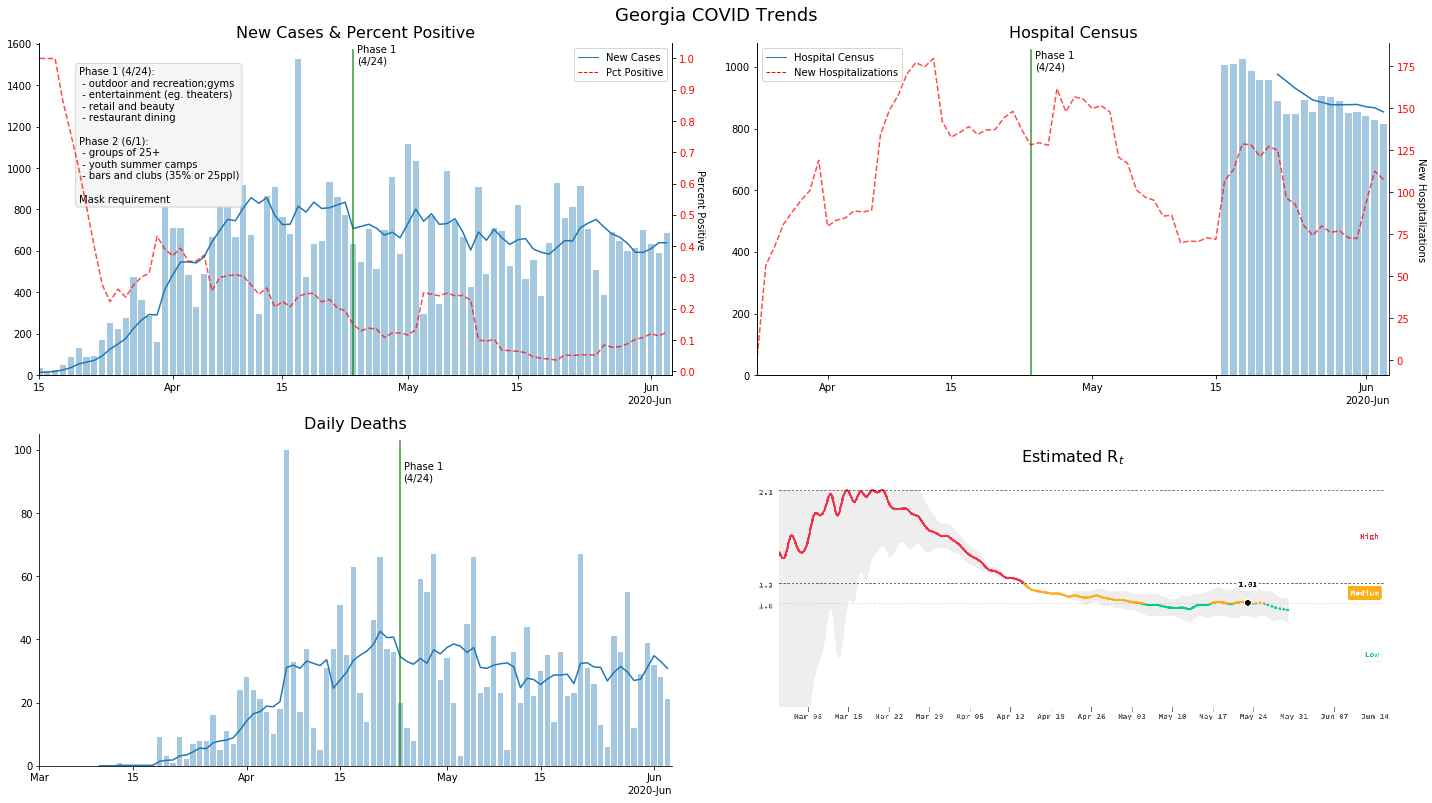

In [5]:
plot_state_data(
    ga_df,
    reopen_x="2020-03-20",
    sip_y=1500,
    reopen_text='Phase 1 (4/24):\n - outdoor and recreation;gyms\n - entertainment (eg. theaters)\n - retail and beauty\n - restaurant dining\n\nPhase 2 (6/1):\n - groups of 25+\n - youth summer camps\n - bars and clubs (35% or 25ppl)\n\nMask requirement',
    reopen_y=1500,
    reopen_y2=990,
    reopen_y3=90,
    x_lim="2020-03-15",
    x_lim2="2020-03-24",
    reopen_date_text="Phase 1\n(4/24)",
    phase2=False,
    phase2_text="Phase 2\n(6/1)",
    phase2_date="2020-06-01",
    hosp_col="hospitalizedCurrently",
    hosp_title="Hospital Census",
    both_hosp=True,
    rt_img="../COVID-19/graphs/HO_June3/ga_rt_0601.png",
    filename="graphs/HO_June3/ga_indicators_0601.png",
    save=False,
)

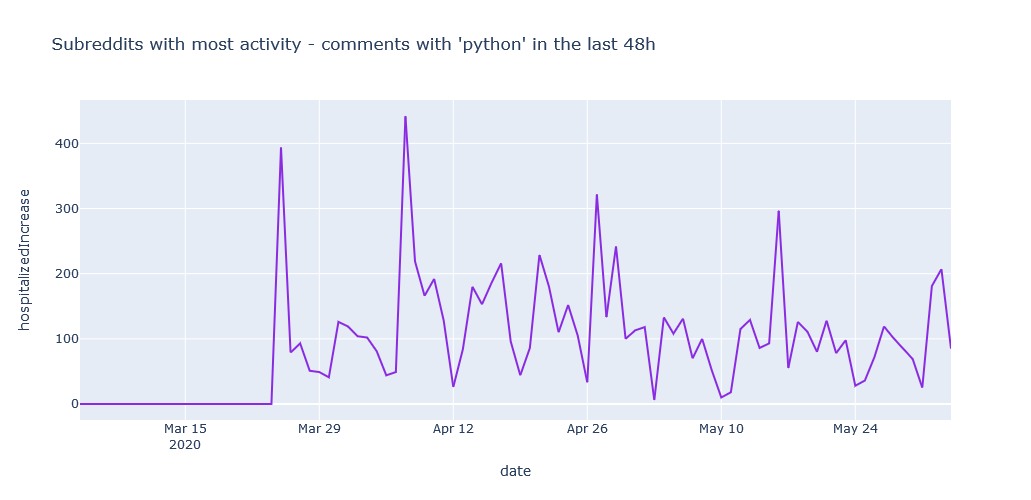

In [8]:
import plotly.express as px

px.bar(ga_df,              # our dataframe
       x="date",         # x will be the 'key' column of the dataframe
       y="hospitalizedCurrently",   # y will be the 'doc_count' column of the dataframe
       title=f"Georgia COVID+ Hospital census",
       labels={"date": "date","hospitalizedCurrently": "Hospital Census"}, # the axis names
       color_discrete_sequence=["blueviolet"], # the colors used
       height=500,
       width=800,)
# px.line(ga_df,              # our dataframe
#        x="date",         # x will be the 'key' column of the dataframe
#        y="hospitalizedIncrease",   # y will be the 'doc_count' column of the dataframe
#        title=f"Subreddits with most activity - comments with 'python' in the last 48h",
#        labels={"date": "date","hospitalizedCurrently": "Hospital Census"}, # the axis names
#        color_discrete_sequence=["blueviolet"], # the colors used
#        height=500,
#        width=800)

In [8]:
state_dict = {"Georgia":"GA", "California":"CA"}
[k for k,v in state_dict.items()]

['Georgia', 'California']

In [6]:
state_dict.values

<function dict.values>

In [13]:
np.arange(0,ga_df["hospitalizedCurrently"].max())

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.022e+03, 1.023e+03,
       1.024e+03])

In [2]:
lst*4

[1, 1, 1, 1]